#LETSGROWMORE-AUGUST2022

##Architha Shevella-Data Science Intern



# Importing the Required Libraries

In [20]:
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    from sklearn.svm import SVC
    from sklearn.preprocessing import LabelEncoder
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix

# Reading the Dataset

In [57]:
#Load the data
ds = pd.read_csv('Iris.csv')
ds

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [58]:
ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
ds.shape

(150, 6)

In [60]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Dropping the Id column

In [61]:
ds.drop(['Id'],axis=1,inplace=True)
ds

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [62]:
# Checking for null values in the Dataset
ds.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [63]:
# Viewing the Statistical Description about the Dataset
ds.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [64]:
# Displaying the number of samples of each class
ds['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


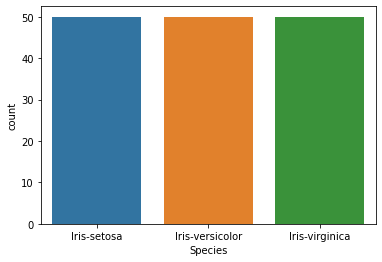

In [65]:
sns.countplot(ds['Species']);

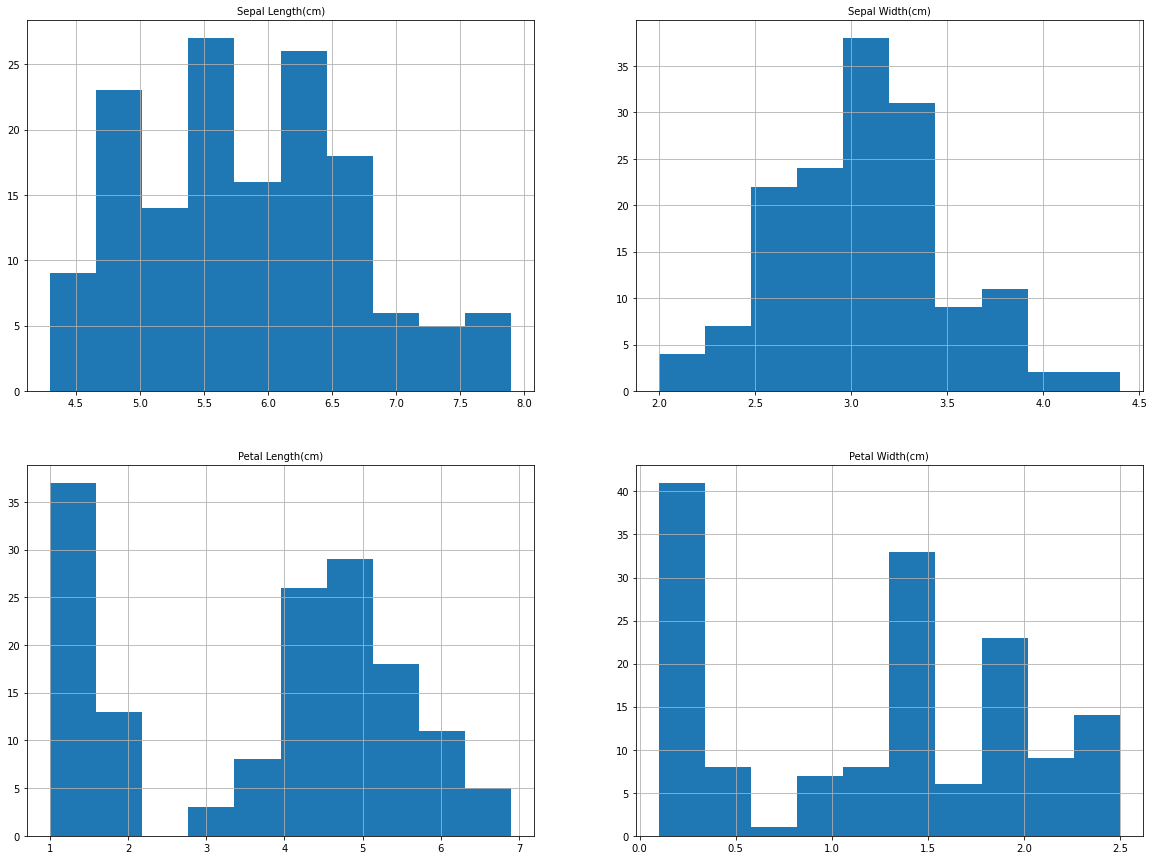

In [66]:
# Plotting the Histogram for the Flower Features
plt.subplots(figsize=(20, 15))

plt.subplot(2,2,1)
plt.title('Sepal Length(cm)',fontsize=10)
plt.hist(ds['SepalLengthCm'])
plt.grid()

plt.subplot(2,2,2)
plt.title('Sepal Width(cm)', fontsize=10)
plt.hist(ds['SepalWidthCm'])
plt.grid()

plt.subplot(2,2,3)
plt.title('Petal Length(cm)', fontsize=10)
plt.hist(ds['PetalLengthCm'])
plt.grid()

plt.subplot(2,2,4)
plt.title('Petal Width(cm)', fontsize=10)
plt.hist(ds['PetalWidthCm'])
plt.grid()

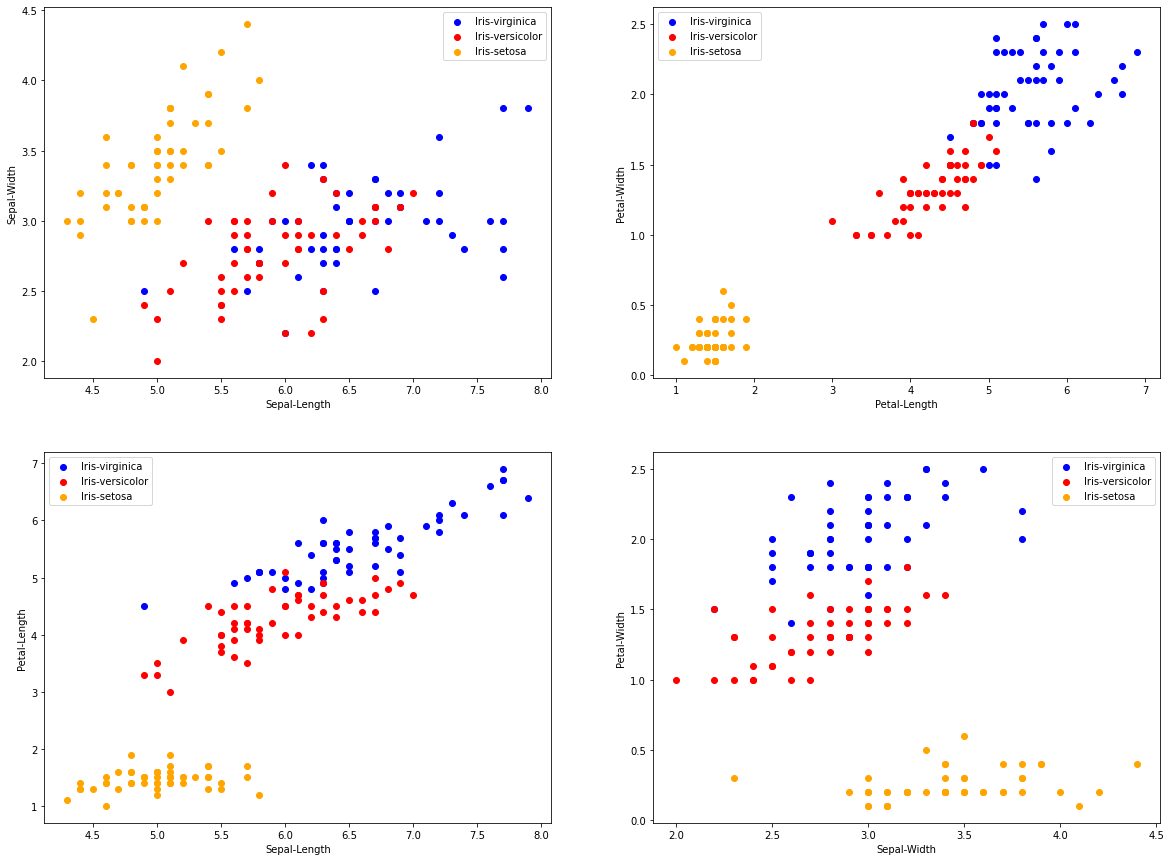

In [80]:
# Scatterplot for the Flower Features (Sepal and Petal Length, and Sepal and Petal Width)
colors = ['blue', 'red', 'orange']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
plt.subplots(figsize=(20,15))
plt.subplot(2,2,1)
for i in range(3):
    x = ds[ds['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal-Length")
plt.ylabel("Sepal-Width")
plt.legend()

plt.subplot(2,2,2)
for i in range(3):
    x = ds[ds['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal-Length")
plt.ylabel("Petal-Width")
plt.legend()

plt.subplot(2,2,3)
for i in range(3):
    x = ds[ds['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal-Length")
plt.ylabel("Petal-Length")
plt.legend()

plt.subplot(2,2,4)
for i in range(3):
    x = ds[ds['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal-Width")
plt.ylabel("Petal-Width")
plt.legend()

# Building the Classification Model

##Encoding the Species column using LabelEncoder


In [68]:
le=LabelEncoder()
ds['Encoded_Species']= le.fit_transform(df['Species'])
ds

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded_Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [69]:
print(ds['Encoded_Species'].value_counts())

0    50
1    50
2    50
Name: Encoded_Species, dtype: int64


Splitting the data

In [70]:
X = ds[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = ds[['Encoded_Species']]

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Training the model using Logistic regression

In [71]:
mdl=LogisticRegression()
mdl.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [72]:
#Accuracy of the Linear Regression Model
mdl_score=model.score(X_test,Y_test)*100
print("Accuracy:",mdl_score)

Accuracy: 100.0


Let us now make Predictions

In [73]:
b = mdl.predict(X_test)
species = ['Setosa', 'Versicolor', 'Virginica']
predict_species = []

for i in a:
    predict_species.append(species[i])

print(f"Label Encoded Prediction of Species: {b} \n")
print(f"Species Names: {predict_species}")

Label Encoded Prediction of Species: [2 2 2 2 1 0 2 1 2 2 1 2 0 2 0 1 1 1 2 1 2 2 2 2 1 1 2 0 1 0] 

Species Names: ['Virginica', 'Virginica', 'Virginica', 'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Setosa']


## Training the model using Decision Tree Classsifier

In [74]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
mdl = DecisionTreeClassifier()

In [75]:
mdl.fit(X_train, Y_train)

DecisionTreeClassifier()

In [76]:
mdl.score(X_test,Y_test)*100

100.0

In [77]:
b = model.predict(X_test)
species = ['Setosa', 'Versicolor', 'Virginica']
predict_species = []

for i in a:
    predict_species.append(species[i])

print(f"Label Encoded Prediction of Species: {b} \n")
print(f"Species Names: {predict_species}")

Label Encoded Prediction of Species: [2 2 2 2 1 0 2 1 2 2 1 2 0 2 0 1 1 1 2 1 2 2 2 2 1 1 2 0 1 0] 

Species Names: ['Virginica', 'Virginica', 'Virginica', 'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Setosa']


## Training the model using Support vector machine

In [46]:
svc = SVC()

svc.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [47]:
svc.score(X_test, Y_test)*100

100.0

In [78]:
b = svc.predict(X_test)
species = ['Setosa', 'Versicolor', 'Virginica']
predict_species = []

for i in a:
    predict_species.append(species[i])

print(f"Label Encoded Prediction of Species: {b} \n")
print(f"Species Names: {predict_species}")

Label Encoded Prediction of Species: [2 2 2 2 1 0 2 1 2 2 1 2 0 2 0 1 1 1 2 1 2 2 2 2 1 1 2 0 1 0] 

Species Names: ['Virginica', 'Virginica', 'Virginica', 'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Setosa']
